In [1]:
# import data libraies 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# calling the date
df = pd.read_csv('Resources/Amilcar_tech.csv',index_col='DATE_VENTE', parse_dates = [0], squeeze=True)

In [3]:
# beginning 5 of data set
df.head()

,ID_VENTE,ID_ARTICLE,ID_CLIENT,ID_ETABLISSEMENT,LIBELLE_VENTE,PRIX_VENTE,DEVISE_VENTE,ANNEE_VENTE,MOIS_VENTE
DATE_VENTE,,,,,,,,,
1/12/2009,1,ML1212 003001 X,SC000019,1,Polo Homme Taille 3 Coloris Blanc,96.88,EUR,2009,1
1/12/2009,2,ML1212 003007 X,SC000019,1,Polo Homme Taille 3 Coloris Acidulé,96.88,EUR,2009,1
1/12/2009,3,ML1212 004001 X,SC000019,1,Polo Homme Taille 4 Coloris Blanc,193.75,EUR,2009,1
1/12/2009,4,ML1212 004007 X,SC000019,1,Polo Homme Taille 4 Coloris Acidulé,193.75,EUR,2009,1
1/12/2009,5,ML1212 005001 X,SC000019,1,Polo Homme Taille 5 Coloris Blanc,290.63,EUR,2009,1


In [4]:
# drop columns except 'Prix_vente' and 'Date_vente'
df.drop(columns=['ID_VENTE', 'ID_ARTICLE', 'ID_CLIENT', 'ID_ETABLISSEMENT', 'LIBELLE_VENTE', 'DEVISE_VENTE', 'ANNEE_VENTE', 'MOIS_VENTE'], inplace=True)
df.head()

,PRIX_VENTE
DATE_VENTE,
1/12/2009,96.88
1/12/2009,96.88
1/12/2009,193.75
1/12/2009,193.75
1/12/2009,290.63


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
series_value = df.values
series_value

array([[ 96.88],
       [ 96.88],
       [193.75],
       ...,
       [  0.  ],
       [  0.  ],
       [  0.  ]])

In [7]:
type(series_value)

numpy.ndarray

In [8]:
df.size

12446

In [9]:
# last five in data set
df.tail()

,PRIX_VENTE
DATE_VENTE,
12/21/2011,0.0
7/6/2012,0.0
7/6/2012,0.0
7/6/2012,0.0
7/6/2012,0.0


In [10]:
#dataframe stats
df.describe()

,PRIX_VENTE
count,12157.000000
mean,394.559032
std,867.885115
min,-1815.550000
25%,21.380000
50%,52.000000
75%,397.070000
max,18418.400000


In [11]:
prix_vente = df.groupby('DATE_VENTE').mean()
prix_vente.head()

,PRIX_VENTE
DATE_VENTE,
1/12/2009,579.229787
1/12/2010,179.400000
1/13/2010,0.000000
1/4/2012,0.000000
1/5/2012,0.000000


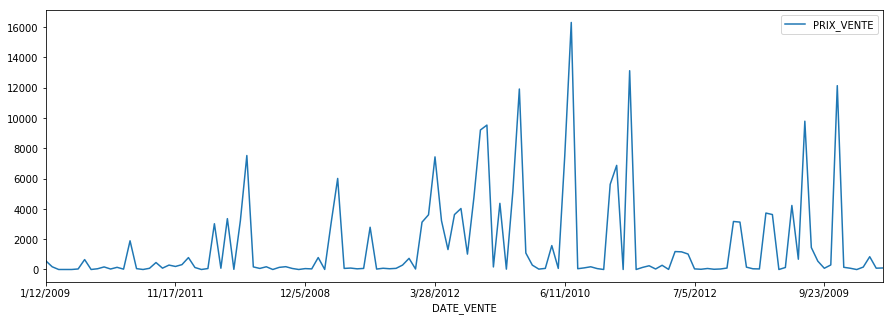

In [12]:
# stationary series 
prix_vente.plot(figsize=(15,5))

In [13]:
#rolling 30 day mean or moving average 
prix_vente_mean = prix_vente.rolling(window = 30).mean()

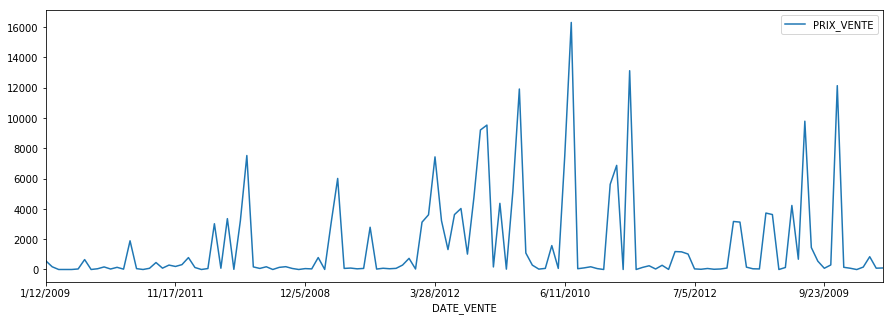

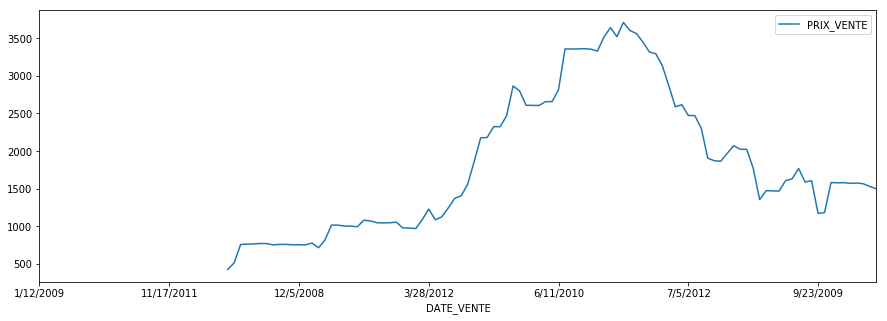

In [14]:
prix_vente.plot(figsize=(15,5))
prix_vente_mean.plot(figsize=(15,5))

In [15]:
value = pd.DataFrame(series_value)

In [16]:
# shift down one row
prix_df = pd.concat([value, value.shift(1)],axis=1)

In [17]:
prix_df.head()

,0,0
0,96.88,NaN
1,96.88,96.88
2,193.75,96.88
3,193.75,193.75
4,290.63,193.75


In [18]:
prix_df.columns = ['Actual_Prix_Vente', 'Forecast_Prix_Vente']

In [19]:
prix_df.head()

,Actual_Prix_Vente,Forecast_Prix_Vente
0,96.88,NaN
1,96.88,96.88
2,193.75,96.88
3,193.75,193.75
4,290.63,193.75


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [21]:
prix_df.head()

,Actual_Prix_Vente,Forecast_Prix_Vente
0,96.88,NaN
1,96.88,96.88
2,193.75,96.88
3,193.75,193.75
4,290.63,193.75


In [22]:
# running large numbers
prix_test = prix_df[~prix_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [23]:
# test range
prix_test = prix_test[1:]

In [24]:
prix_error = mean_squared_error(prix_test.Actual_Prix_Vente, prix_test.Forecast_Prix_Vente)

In [25]:
prix_error

394234.5151479938

In [26]:
# Sqr root
np.sqrt(prix_error)

627.8809721181187

In [ ]:
ARIMA - Autoregression (p) Integrated (d) Moving Average (q)

In [28]:
# import libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

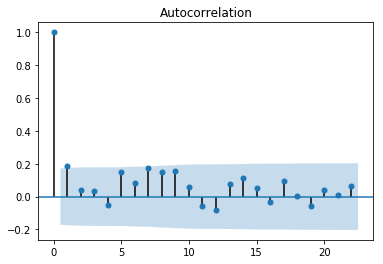

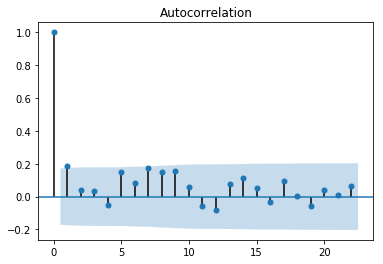

In [29]:
#plot_acf is to indentify parameter Q
#ARIMA (P,D,Q)
plot_acf(prix_vente)

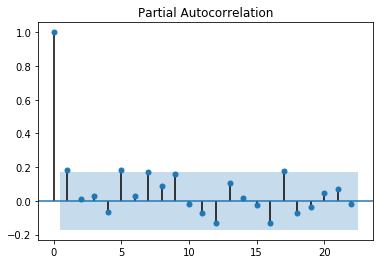

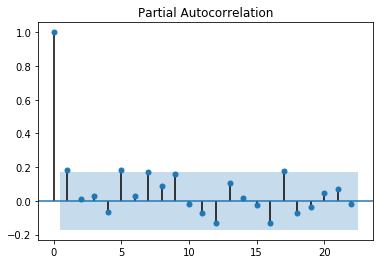

In [30]:
#plot_pacf is to indentify parameter P

plot_pacf(prix_vente)

In [31]:
# p = 2,3 d = 0 &q = 3,4
df.size

12446

In [32]:
prix_train = df[0:12000]
prix_test = df[12000:12446]

In [33]:
prix_train.size

12000

In [34]:
prix_test.size

446

In [35]:
# import ARIMA
from statsmodels.tsa.arima_model import ARIMA


In [36]:
prix_train = prix_train.reset_index()
prix_train.head()

,DATE_VENTE,PRIX_VENTE
0,1/12/2009,96.88
1,1/12/2009,96.88
2,1/12/2009,193.75
3,1/12/2009,193.75
4,1/12/2009,290.63


In [37]:
prix_train["DATE_VENTE"]=pd.to_datetime(prix_train["DATE_VENTE"])

In [38]:
prix_train.dtypes

DATE_VENTE    datetime64[ns]
PRIX_VENTE           float64
dtype: object

In [56]:
model = ARIMA(prix_train['DATE_VENTE'].values, order=(5,1,0))

In [60]:
prix_model = model.fit(disp=0)

In [63]:

print(prix_model.summary())

                              ARIMA Model Results                               
Dep. Variable:                    D.y   No. Observations:                  11999
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -457645.635
Method:                       css-mle   S.D. of innovations 8869259797753183.000
Date:                Tue, 09 Jun 2020   AIC                           915305.270
Time:                        05:25:27   BIC                           915357.018
Sample:                             1   HQIC                          915322.629
                                                                                
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.887e+12   4.51e+13      0.042      0.967   -8.65e+13    9.03e+13
ar.L1.D.y     -0.4011      0.009    -43.987      0.000      -0.419      -0.383
ar.L2.D.y     -0.1969      0.010    

In [ ]:
prix_forecast = prix_model.forecast(steps = 100)[0]